In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/content/patient_survival.zip',header=None, names=['age','operational_year','exil_node','survival'])

colums: age,'operational_year','exil_node','survival'
the heading to column i gave after checking the data...



In [3]:
df.head()

,age,operational_year,exil_node,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               306 non-null    int64
 1   operational_year  306 non-null    int64
 2   exil_node         306 non-null    int64
 3   survival          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
df.shape

(306, 4)

In [6]:
df.describe()

,age,operational_year,exil_node,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
df.isnull().sum()

,0
age,0
operational_year,0
exil_node,0
survival,0


In [8]:
df.duplicated().sum()

np.int64(17)

<Axes: >

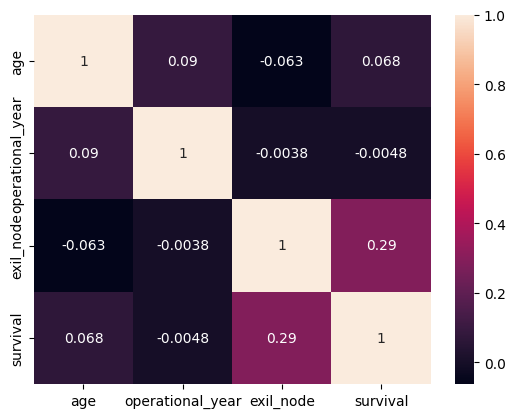

In [9]:
sns.heatmap(df.corr(),annot=True)

/tmp/ipython-input-10-1164331168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['operational_year'])


<Axes: xlabel='operational_year', ylabel='Density'>

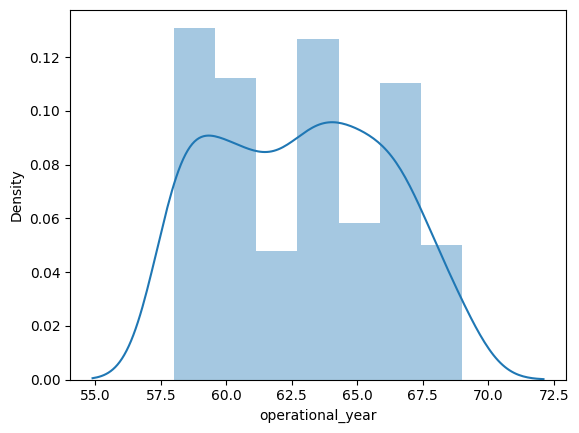

In [10]:
sns.distplot(df['operational_year'])

<Axes: xlabel='age', ylabel='Count'>

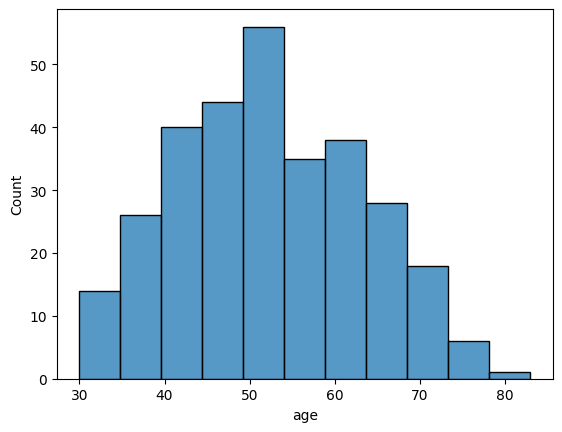

In [11]:
sns.histplot(df['age'])


<Axes: xlabel='age', ylabel='survival'>

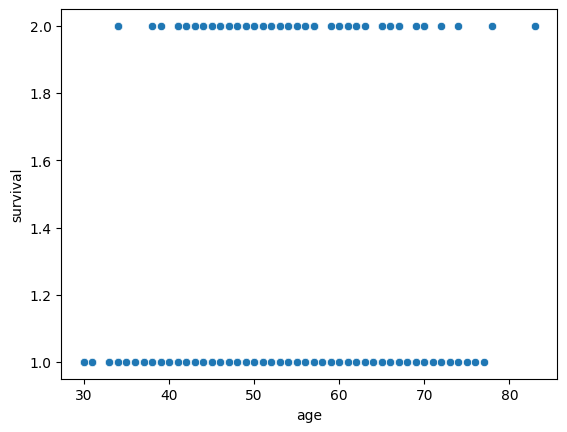

In [12]:
sns.scatterplot(x=df['age'],y=df['survival'])

In [13]:
X = df.drop("survival",axis=1)
Y = df['survival']

In [14]:
X.shape

(306, 3)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [16]:
sclr = StandardScaler()

In [17]:
sclr.fit((X_train))

StandardScaler()

In [18]:
X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [21]:
from sklearn.metrics import accuracy_score

models = {
    "lr": LogisticRegression(),
    "dt": DecisionTreeClassifier(),
    "rf": RandomForestClassifier(),
    "nb": GaussianNB()
}

for name, algo in models.items():
  algo.fit(X_train_resampled, Y_train_resampled)
  y_pred = algo.predict(X_test)
  print(f"{name} with accuracy : {accuracy_score(Y_test, y_pred)}")

lr with accuracy : 0.7258064516129032
dt with accuracy : 0.5806451612903226
rf with accuracy : 0.6129032258064516
nb with accuracy : 0.6774193548387096


In [23]:
lrf = LogisticRegression()
lrf.fit(X_train,Y_train)
lrf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    features = sclr.fit_transform(features)
    pred = lrf.predict(features).reshape(1,-1)
    return pred[0]


age = 50
oy = 61
en = 2

res = pred(age,oy,en)